# Pandas

* Pandas can roughly be interpreted as "python data analysis", but the name originally came from "panel data"
* Its data is stored in numpy arrays, and many concepts are the same.  But a lot nicer interface for data analysis.  It provides more high-level support for typical data processing.

These examples come directly from [10 minutes to Pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html) from the Pandas documentation.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])

In [3]:
dates = pd.date_range('20130101', periods=6)

In [4]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [5]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })


In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [7]:
df.head()

,A,B,C,D
2013-01-01,0.404002,0.203599,1.491441,-1.782873
2013-01-02,1.267392,0.046585,-0.121023,0.202417
2013-01-03,-0.711454,1.531833,-0.236201,-1.044050
2013-01-04,-1.664955,0.250487,1.897635,-1.132515
2013-01-05,-0.244441,-1.921077,0.713551,-0.576059


In [8]:
df.tail(3)

,A,B,C,D
2013-01-04,-1.664955,0.250487,1.897635,-1.132515
2013-01-05,-0.244441,-1.921077,0.713551,-0.576059
2013-01-06,-0.492241,1.616457,1.044590,-1.085367


In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [11]:
df.values

array([[ 0.40400186,  0.20359893,  1.49144148, -1.78287287],
       [ 1.26739213,  0.04658479, -0.12102313,  0.20241711],
       [-0.71145358,  1.53183342, -0.23620109, -1.04405016],
       [-1.66495451,  0.25048746,  1.89763536, -1.13251463],
       [-0.24444143, -1.9210772 ,  0.71355108, -0.57605868],
       [-0.49224147,  1.61645706,  1.0445896 , -1.08536666]])

In [12]:
df2.values

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [13]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.240283,0.287981,0.798332,-0.903074
std,1.000338,1.285205,0.856991,0.664657
min,-1.664955,-1.921077,-0.236201,-1.782873
25%,-0.656651,0.085838,0.087620,-1.120728
50%,-0.368341,0.227043,0.879070,-1.064708
75%,0.241891,1.211497,1.379729,-0.693057
max,1.267392,1.616457,1.897635,0.202417


In [14]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.404002,1.267392,-0.711454,-1.664955,-0.244441,-0.492241
B,0.203599,0.046585,1.531833,0.250487,-1.921077,1.616457
C,1.491441,-0.121023,-0.236201,1.897635,0.713551,1.044590
D,-1.782873,0.202417,-1.044050,-1.132515,-0.576059,-1.085367


In [15]:
df.sort_values(by='B')

,A,B,C,D
2013-01-05,-0.244441,-1.921077,0.713551,-0.576059
2013-01-02,1.267392,0.046585,-0.121023,0.202417
2013-01-01,0.404002,0.203599,1.491441,-1.782873
2013-01-04,-1.664955,0.250487,1.897635,-1.132515
2013-01-03,-0.711454,1.531833,-0.236201,-1.044050
2013-01-06,-0.492241,1.616457,1.044590,-1.085367


# Selection and indexing
Pandas does selection more intuitively than numpy - but that can mean inconsistent sometimes.

In [16]:
# Select columns
df['A']      # same as df.A.  Problem?

2013-01-01    0.404002
2013-01-02    1.267392
2013-01-03   -0.711454
2013-01-04   -1.664955
2013-01-05   -0.244441
2013-01-06   -0.492241
Freq: D, Name: A, dtype: float64

In [17]:
# Select rows - note same syntax as above.  What happens if there is ambiguity?
df[0:3]

,A,B,C,D
2013-01-01,0.404002,0.203599,1.491441,-1.782873
2013-01-02,1.267392,0.046585,-0.121023,0.202417
2013-01-03,-0.711454,1.531833,-0.236201,-1.044050


In [18]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,1.267392,0.046585,-0.121023,0.202417
2013-01-03,-0.711454,1.531833,-0.236201,-1.044050
2013-01-04,-1.664955,0.250487,1.897635,-1.132515


In [19]:
df.loc[dates[0]]

A    0.404002
B    0.203599
C    1.491441
D   -1.782873
Name: 2013-01-01 00:00:00, dtype: float64

In [20]:
df.loc[:,['A','B']]


,A,B
2013-01-01,0.404002,0.203599
2013-01-02,1.267392,0.046585
2013-01-03,-0.711454,1.531833
2013-01-04,-1.664955,0.250487
2013-01-05,-0.244441,-1.921077
2013-01-06,-0.492241,1.616457


In [21]:
df.loc[:,['A','B']]

,A,B
2013-01-01,0.404002,0.203599
2013-01-02,1.267392,0.046585
2013-01-03,-0.711454,1.531833
2013-01-04,-1.664955,0.250487
2013-01-05,-0.244441,-1.921077
2013-01-06,-0.492241,1.616457


In [22]:
df.loc['20130102',['A','B']]

A    1.267392
B    0.046585
Name: 2013-01-02 00:00:00, dtype: float64

In [23]:
df.loc[dates[0],'A']


0.40400185911871095

In [24]:
df.at[dates[0],'A']

0.40400185911871095

In [25]:
df.iloc[3]

A   -1.664955
B    0.250487
C    1.897635
D   -1.132515
Name: 2013-01-04 00:00:00, dtype: float64

In [26]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-1.664955,0.250487
2013-01-05,-0.244441,-1.921077


In [27]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-1.664955,0.250487
2013-01-05,-0.244441,-1.921077


In [28]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-1.664955,0.250487
2013-01-05,-0.244441,-1.921077


In [29]:
df.iloc[:,1:3]

,B,C
2013-01-01,0.203599,1.491441
2013-01-02,0.046585,-0.121023
2013-01-03,1.531833,-0.236201
2013-01-04,0.250487,1.897635
2013-01-05,-1.921077,0.713551
2013-01-06,1.616457,1.044590


In [30]:
df.iloc[1,1]

0.04658479077928202

In [31]:
df.iloc[1,1]

0.04658479077928202

In [32]:
df[df.A > 0]

,A,B,C,D
2013-01-01,0.404002,0.203599,1.491441,-1.782873
2013-01-02,1.267392,0.046585,-0.121023,0.202417


In [33]:
df[df > 0]

,A,B,C,D
2013-01-01,0.404002,0.203599,1.491441,NaN
2013-01-02,1.267392,0.046585,NaN,0.202417
2013-01-03,NaN,1.531833,NaN,NaN
2013-01-04,NaN,0.250487,1.897635,NaN
2013-01-05,NaN,NaN,0.713551,NaN
2013-01-06,NaN,1.616457,1.044590,NaN


In [34]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,0.404002,0.203599,1.491441,-1.782873,one
2013-01-02,1.267392,0.046585,-0.121023,0.202417,one
2013-01-03,-0.711454,1.531833,-0.236201,-1.044050,two
2013-01-04,-1.664955,0.250487,1.897635,-1.132515,three
2013-01-05,-0.244441,-1.921077,0.713551,-0.576059,four
2013-01-06,-0.492241,1.616457,1.044590,-1.085367,three


In [35]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,0.404002,0.203599,1.491441,-1.782873,NaN
2013-01-02,1.267392,0.046585,-0.121023,0.202417,1.0
2013-01-03,-0.711454,1.531833,-0.236201,-1.044050,2.0
2013-01-04,-1.664955,0.250487,1.897635,-1.132515,3.0
2013-01-05,-0.244441,-1.921077,0.713551,-0.576059,4.0
2013-01-06,-0.492241,1.616457,1.044590,-1.085367,5.0


In [36]:
df.at[dates[0],'A'] = 0

# Missing data
Missing data handling is one of the nicest features of pandas:

In [37]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.203599,1.491441,-1.782873,NaN,NaN
2013-01-02,1.267392,0.046585,-0.121023,0.202417,1.0,NaN
2013-01-03,-0.711454,1.531833,-0.236201,-1.044050,2.0,NaN
2013-01-04,-1.664955,0.250487,1.897635,-1.132515,3.0,NaN


In [38]:
df1.loc[dates[0]:dates[1],'E'] = 1


In [39]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,1.267392,0.046585,-0.121023,0.202417,1.0,1.0


In [40]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.203599,1.491441,-1.782873,5.0,1.0
2013-01-02,1.267392,0.046585,-0.121023,0.202417,1.0,1.0
2013-01-03,-0.711454,1.531833,-0.236201,-1.044050,2.0,5.0
2013-01-04,-1.664955,0.250487,1.897635,-1.132515,3.0,5.0


In [41]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.203599,1.491441,-1.782873,5.0,1.0
2013-01-02,1.267392,0.046585,-0.121023,0.202417,1.0,1.0
2013-01-03,-0.711454,1.531833,-0.236201,-1.044050,2.0,5.0
2013-01-04,-1.664955,0.250487,1.897635,-1.132515,3.0,5.0


# Operations

Operations generally do the right things in the face of missing data!

In [42]:
df.mean()

A   -0.307616
B    0.287981
C    0.798332
D   -0.903074
F    3.000000
dtype: float64

In [43]:
df.mean(axis=1)

2013-01-01   -0.021958
2013-01-02    0.479074
2013-01-03    0.308026
2013-01-04    0.470131
2013-01-05    0.394395
2013-01-06    1.216688
Freq: D, dtype: float64

# Time series

In [44]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2012-01-01    27530
Freq: 5T, dtype: int64

In [45]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts_utc = ts.tz_localize('UTC')

In [46]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.519220
2012-03-06 19:00:00-05:00    1.409418
2012-03-07 19:00:00-05:00    0.608659
2012-03-08 19:00:00-05:00   -0.219932
2012-03-09 19:00:00-05:00    0.694307
Freq: D, dtype: float64

In [47]:
rng = pd.date_range('1/1/2012', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-01   -0.561491
2012-01-02   -0.577425
2012-01-03    0.692724
2012-01-04   -1.390567
2012-01-05    0.184132
Freq: D, dtype: float64

# Data alignment
Data alignment based on indexing, combined with missing data handling, is another of the most useful things in pandas

In [48]:
dates = pd.date_range('1/1/2012', periods=10, freq='D')
ts = pd.Series(np.random.randint(0, 10, len(dates)), index=dates)
ts

2012-01-01    7
2012-01-02    2
2012-01-03    3
2012-01-04    9
2012-01-05    1
2012-01-06    6
2012-01-07    3
2012-01-08    1
2012-01-09    1
2012-01-10    1
Freq: D, dtype: int64

In [49]:
ts[:5] + ts

2012-01-01    14.0
2012-01-02     4.0
2012-01-03     6.0
2012-01-04    18.0
2012-01-05     2.0
2012-01-06     NaN
2012-01-07     NaN
2012-01-08     NaN
2012-01-09     NaN
2012-01-10     NaN
Freq: D, dtype: float64

In [50]:
dates1 = pd.date_range('1/1/2012', periods=10, freq='D')
ts1    = pd.Series(np.random.randint(0, 10, len(dates1)), index=dates1)
dates2 = pd.date_range('1/5/2012', periods=10, freq='D')
ts2    = pd.Series(np.random.randint(0, 10, len(dates2)), index=dates2)
ts1 + ts2

2012-01-01     NaN
2012-01-02     NaN
2012-01-03     NaN
2012-01-04     NaN
2012-01-05     8.0
2012-01-06     9.0
2012-01-07    14.0
2012-01-08    13.0
2012-01-09    11.0
2012-01-10     4.0
2012-01-11     NaN
2012-01-12     NaN
2012-01-13     NaN
2012-01-14     NaN
Freq: D, dtype: float64

# Plotting
We'll do this later (day 3), but for now...

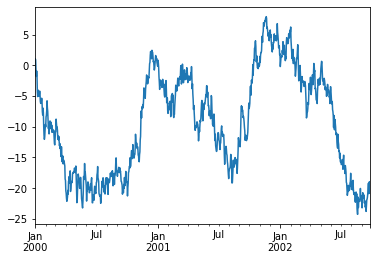

In [51]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

# Reading data in pandas
There is lots of support for automatically reading in data in various formats.  Let's use the same dataset as last time, and see what new we can do.

In [52]:
iris = pd.read_csv('../data/iris.data',
                   names=('sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'type'))
iris.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Exercises 04
These exercises are taken with pride from https://github.com/ajcr/100-pandas-puzzles

## DataFrame basics


Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```
(This is just some meaningless data I made up with the theme of animals and trips to a vet.)

**4.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [53]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']


**5.** Display a summary of the basic information about this DataFrame and its data.

**6.** Return the first 3 rows of the DataFrame `df`.

**7.** Select just the 'animal' and 'age' columns from the DataFrame `df`.

**8.** Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.

**9.** Select only the rows where the number of visits is greater than 3.

**10.** Select the rows where the age is missing, i.e. is `NaN`.

**11.** Select the rows where the animal is a cat *and* the age is less than 3.

**12.** Select the rows the age is between 2 and 4 (inclusive).

**13.** Change the age in row 'f' to 1.5.

**14.** Calculate the sum of all visits (the total number of visits).

**15.** Calculate the mean age for each different animal in `df`.

**16.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

**17.** Count the number of each type of animal in `df`.

**18.** Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visit' column in *ascending* order.

**19.** The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

**20.** In the 'animal' column, change the 'snake' entries to 'python'.

**21.** For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (hint: use a pivot table).

## DataFrames: beyond the basics

### Slightly trickier: you may need to combine two or more methods to get the right answer

Difficulty: *medium*

The previous section was tour through some basic but essential DataFrame operations. Below are some ways that you might need to cut your data, but for which there is no single "out of the box" method.

**22.** You have a DataFrame `df` with a column 'A' of integers. For example:
```python
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
```

How do you filter out rows which contain the same integer as the row immediately above?

**23.** Given a DataFrame of numeric values, say
```python
df = pd.DataFrame(np.random.random(size=(5, 3))) # a 5x3 frame of float values
```

how do you subtract the row mean from each element in the row?

**24.** Suppose you have DataFrame with 10 columns of real numbers, for example:

```python
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
```
Which column of numbers has the smallest sum? (Find that column's label.)

**25.** How do you count how many unique rows a DataFrame has (i.e. ignore all rows that are duplicates)?

The next three puzzles are slightly harder...

**26.** You have a DataFrame that consists of 10 columns of floating--point numbers. Suppose that exactly 5 entries in each row are NaN values. For each row of the DataFrame, find the *column* which contains the *third* NaN value.

(You should return a Series of column labels.)

**27.** A DataFrame has a column of groups 'grps' and and column of numbers 'vals'. For example: 

```python
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
```
For each *group*, find the sum of the three greatest values.

**28.** A DataFrame has two integer columns 'A' and 'B'. The values in 'A' are between 1 and 100 (inclusive). For each group of 10 consecutive integers in 'A' (i.e. `(0, 10]`, `(10, 20]`, ...), calculate the sum of the corresponding values in column 'B'.